## Random Forest - Company Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### We have to convert Sales continuous data to categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
n_bins = 3
y = label_encoder.fit_transform(pd.cut(df['Sales'], n_bins, retbins=True)[0])

In [6]:
pd.cut(df['Sales'], n_bins, retbins=True)[0].dtype

CategoricalDtype(categories=[(-0.0163, 5.423], (5.423, 10.847], (10.847, 16.27]],
              ordered=True)

### So we can see that Sales data is now transformed into 3 bins(categories)

In [7]:
df.Sales =y

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### No Null values present in data set so we are good to go with feature engineering (creating dummy variables for ShelveLoc, Urban, US variables)

In [10]:
dummy_shel = pd.get_dummies(df.ShelveLoc)

In [11]:
df = pd.concat([df.drop("ShelveLoc",axis=1),dummy_shel],axis=1)

In [12]:
df = pd.get_dummies(df,drop_first=True)

In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Bad,Good,Medium,Urban_Yes,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,1,1
1,2,111,48,16,260,83,65,10,0,1,0,1,1
2,1,113,35,10,269,80,59,12,0,0,1,1,1
3,1,117,100,4,466,97,55,14,0,0,1,1,1
4,0,141,64,3,340,128,38,13,1,0,0,1,0


### Lets create X and y variables and split them for training and testing

In [14]:
X= df.drop("Sales",axis=1)
y= df.Sales

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier(n_estimators=120,max_features='auto',random_state=101)

In [36]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120, random_state=101)

In [37]:
preds = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

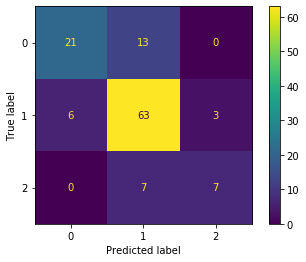

In [39]:
plot_confusion_matrix(model,X_test,y_test)

In [40]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        34
           1       0.76      0.88      0.81        72
           2       0.70      0.50      0.58        14

    accuracy                           0.76       120
   macro avg       0.75      0.66      0.69       120
weighted avg       0.76      0.76      0.75       120



In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
n_estimators=[64,100,128,150,200]
max_features= [2,3,4,5,6,7,8,9]
bootstrap = [True,False]
oob_score = [True,False]

In [43]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

In [44]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [45]:
grid.fit(X_train,y_train)

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [64, 100, 128, 150, 200],
                         'oob_score': [True, False]})

In [46]:
grid.best_params_

{'bootstrap': True, 'max_features': 7, 'n_estimators': 64, 'oob_score': False}

In [47]:
predictions = grid.predict(X_test)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        34
           1       0.76      0.85      0.80        72
           2       0.64      0.50      0.56        14

    accuracy                           0.75       120
   macro avg       0.72      0.66      0.69       120
weighted avg       0.75      0.75      0.74       120



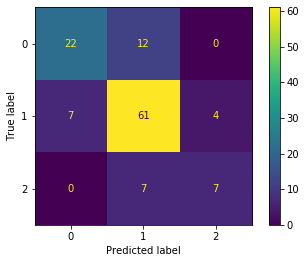

In [49]:
plot_confusion_matrix(grid,X_test,y_test)

In [50]:
print(grid.best_params_)

{'bootstrap': True, 'max_features': 7, 'n_estimators': 64, 'oob_score': False}


### We can now clearly say that Random Forest model has best estimates/accuracy when compared to Decision tree model for company dataset also with grid search we have got best parameter for Random Forest model.